In [1]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

<h2> Задача №4.1

In [2]:
sample = stats.uniform.rvs(loc=0, scale=1, size=50, random_state=0)
sample

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077])

In [3]:
def boot_max(sample, n):
    boot_max = []
    for i in range(len(sample)):
        boot_max.append(np.max(np.random.choice(sample, replace=True, size=n)))
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    ax[0].hist(boot_max)
    domain = np.linspace(0, 1, 1000)
    ax[1].plot(domain, domain**len(sample))
    plt.show()
#    return boot_max 

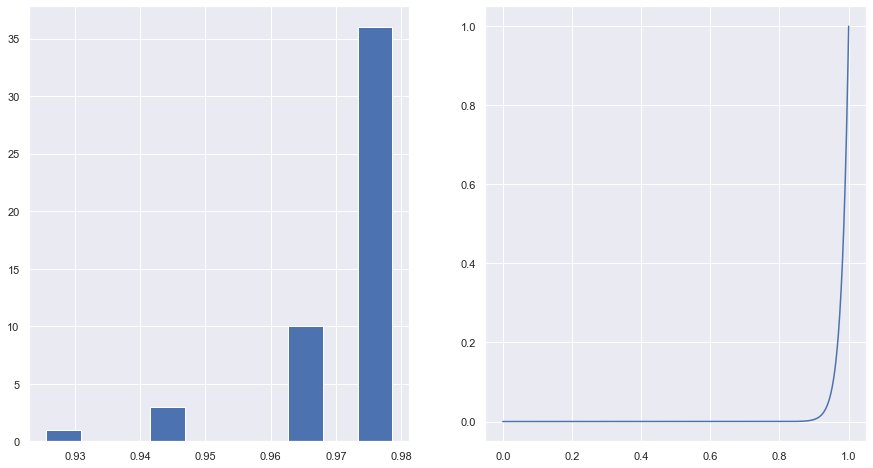

In [4]:
boot_max(sample, 50)

<h2> Задача №4.2

In [5]:
sample = stats.norm.rvs(loc=5, scale=1, size=100, random_state=0)

In [6]:
sample

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ,
       5.14404357, 6.45427351, 5.76103773, 5.12167502, 5.44386323,
       5.33367433, 6.49407907, 4.79484174, 5.3130677 , 4.14590426,
       2.44701018, 5.6536186 , 5.8644362 , 4.25783498, 7.26975462,
       3.54563433, 5.04575852, 4.81281615, 6.53277921, 6.46935877,
       5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725,
       3.95144703, 3.57998206, 3.29372981, 6.9507754 , 4.49034782,
       4.5619257 , 3.74720464, 5.77749036, 3.38610215, 4.78725972,
       4.10453344, 5.3869025 , 4.48919486, 3.81936782, 4.97181777,
       5.42833187, 5.06651722, 5.3024719 , 4.36567791, 4.63725883,
       4.32753955, 4.64044684, 4.18685372, 3.2737174 , 5.17742614,
       4.59821906, 3.36980165, 5.46278226, 4.09270164, 5.0519454 ,
       5.72909056, 5.12898291, 6.13940068, 3.76517418, 5.40234

In [7]:
#Распределение статистики e^(mean(Xi))
def dens(t, n):
    if t > 0:
        return np.sqrt(n/(2*np.pi))*np.exp(-(n*(np.log(t) - 5)**2)/2)/t
    else:
        return 0
vdens = np.vectorize(dens)

In [8]:
def boot_esti_interval(sample, n):
    boot = []
    for i in range(len(sample)):
        boot.append(np.exp(np.mean(np.random.choice(sample, replace=True, size=n))))
        
    std_boot = np.std(boot)
    T_n = np.exp(np.mean(sample))
    
    #endpoints of the 95-percentile normal interval
    C = (T_n + stats.norm.ppf(0.025)*np.std(boot), T_n - stats.norm.ppf(0.025)*np.std(boot))
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    
    ax[0].hist(boot)
    domain = np.linspace(100, 200, 1000)
    ax[1].plot(domain, vdens(domain, len(sample)))
    
    plt.show()
    
    return std_boot, C

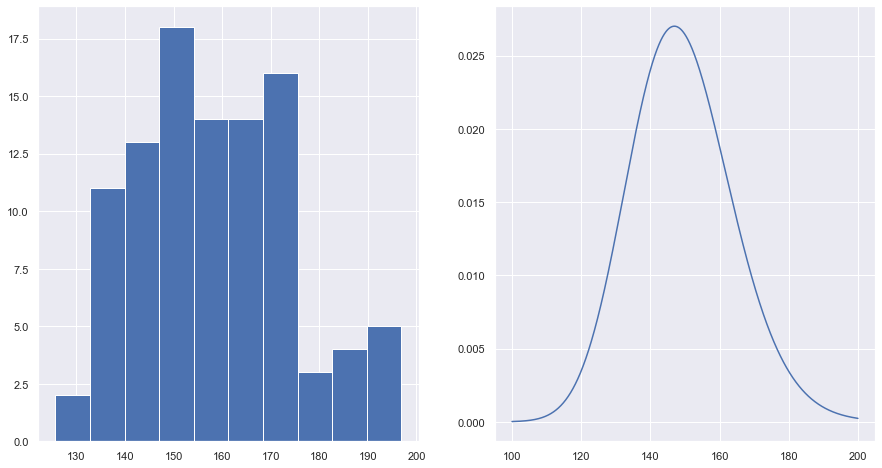

(15.771754795191056, (126.64819292480156, 188.47233566794432))

In [9]:
boot_esti_interval(sample, 100)

<h3> Задача №3

In [10]:
#Вспомогательная функция для вычисления выборочных квантилей 
def quantile(boot, alpha):
    boot.sort()
    K = int(alpha*(len(boot)- 1))
    if K + 1 < alpha*len(boot):
        return boot[K+1]
    if abs(K + 1 - alpha*len(boot)) < 1/len(boot):
        return (boot[K] + boot[K+1])/2
    if K + 1 > alpha*len(boot):
        return boot[K]

In [37]:
Y = stats.norm.rvs(loc=0, scale=1, size=20000)
X = np.exp(Y)

In [38]:
stats.skew(Y, bias=False)

-0.01621495732047431

In [39]:
print('Коэффициент ассиметрии X:', (2 - 3*np.exp(1) + np.exp(3))/((np.exp(1) - 1)**(3/2)))

Коэффициент ассиметрии X: 6.184877138632556


<h4> Построим нормальный, pivotal, percentile интервалы

In [40]:
boot = []
for i in range(len(X)):
    boot.append(stats.skew(np.random.choice(X, replace=True, size=len(X))))

T_n = stats.skew(X)
print('Stat T_n:', T_n,'\n')

#endpoints of the 95-percentile normal interval
print('Normal interval:')
C = (T_n + stats.norm.ppf(0.025)*np.std(boot), T_n - stats.norm.ppf(0.025)*np.std(boot))
print(C)
print('='*50)

#endpoints of the 95-percentile pivotal interval
print('Pivotal interval:')
C = (2*T_n - quantile(boot, 1 - (0.05/2)), 2*T_n + quantile(boot, 0.05/2))
print(C)
print('='*50)

#endpoints of the 95-percentile interval 
print('Percentile interval:')
C = (quantile(boot, 0.05/2), quantile(boot, 1 - (0.05/2)))
print(C)
print('='*50)

Stat T_n: 5.90222156711533 

Normal interval:
(3.8673300157745905, 7.937113118456069)
Pivotal interval:
(3.8375676608490767, 16.167169659833903)
Percentile interval:
(4.362726525603245, 7.966875473381583)


<h3> Задача №4

In [15]:
stud = stats.t.rvs(3, size=25)

In [16]:
print('Интерквартильный размах:', (stats.t.ppf(0.75, 3)-stats.t.ppf(0.25, 3))/1.34)

Интерквартильный размах: 1.1416303404192403


<h4> Построим нормальный, pivotal, percentile интервалы 

In [17]:
boot = []
for i in range(len(stud)):
    boot.append((quantile(np.random.choice(stud, replace=True,size=len(stud)), 0.75) - 
                quantile(np.random.choice(stud, replace=True,size=len(stud)), 0.25))/1.34)

T_n = (quantile(stud, 0.75) - quantile(stud, 0.25))/1.34
print('Stat T_n:', T_n,'\n')

#endpoints of the 95-percentile normal interval
print('Normal interval:')
C = (T_n + stats.norm.ppf(0.025)*np.std(boot), T_n - stats.norm.ppf(0.025)*np.std(boot))
print(C)
print('-'*50)

#endpoints of the 95-percentile pivotal interval
print('Pivotal interval:')
C = (2*T_n - quantile(boot, 1 - (0.05/2)), 2*T_n + quantile(boot, 0.05/2))
print(C)
print('-'*50)

#endpoints of the 95-percentile interval 
print('Percentile interval:')
C = (quantile(boot, 0.05/2), quantile(boot, 1 - (0.05/2)))
print(C)
print('-'*50)

Stat T_n: 1.5131068653172304 

Normal interval:
(0.7037300439786411, 2.3224836866558194)
--------------------------------------------------
Pivotal interval:
(0.6381527128895197, 3.890450768864314)
--------------------------------------------------
Percentile interval:
(0.864237038229853, 2.388061017744941)
--------------------------------------------------
